<a href="https://colab.research.google.com/github/robinsingh2022/NorthwesternMSDS422/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Assignment 2 Part 1

##Ingest

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/data/train.csv'

In [ ]:
df = pd.read_csv(path)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##EDA

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
import seaborn as sns
%matplotlib inline

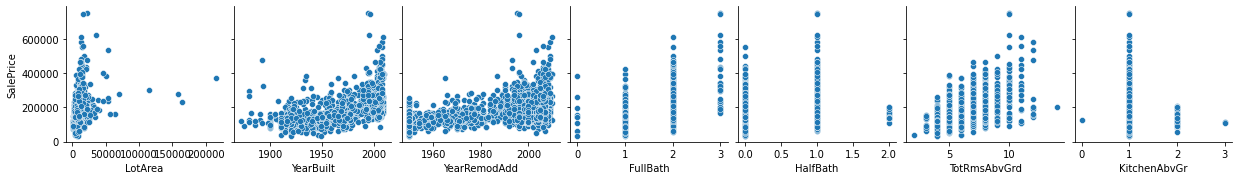

In [ ]:
sns.pairplot(df, x_vars=['LotArea', 'YearBuilt', 'YearRemodAdd', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'KitchenAbvGr', ], y_vars='SalePrice')

In [ ]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


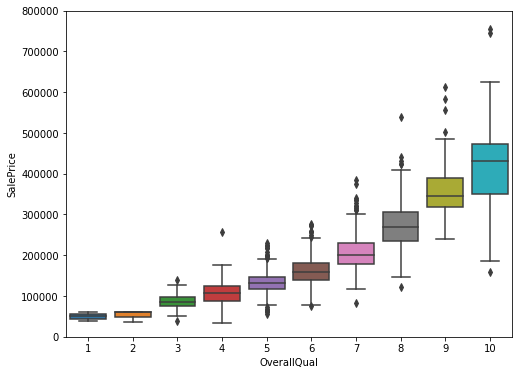

In [ ]:
import matplotlib.pyplot as plt
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

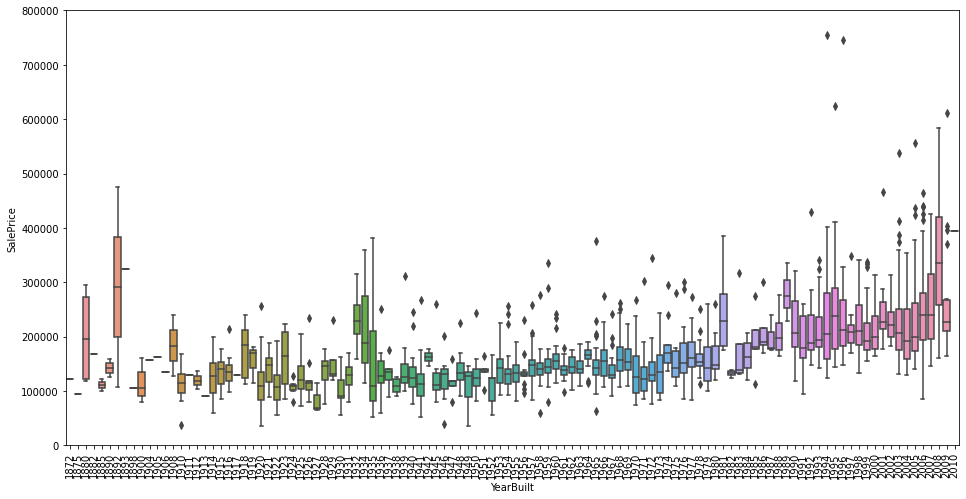

In [ ]:
data = pd.concat([df['SalePrice'], df['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [ ]:
df["SaleCondition"].unique()

array(['Normal', 'Abnorml', 'Partial', 'AdjLand', 'Alloca', 'Family'],
      dtype=object)

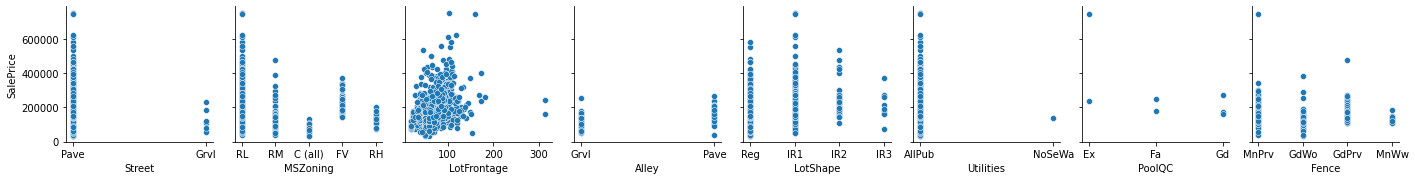

In [ ]:
sns.pairplot(df, x_vars=['Street','MSZoning', 'LotFrontage', 'Alley', 'LotShape','Utilities','PoolQC','Fence'], y_vars='SalePrice')

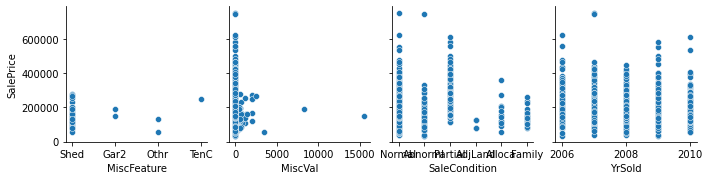

In [ ]:
sns.pairplot(df, x_vars=[ 'MiscFeature', 'MiscVal','SaleCondition','YrSold'], y_vars='SalePrice')

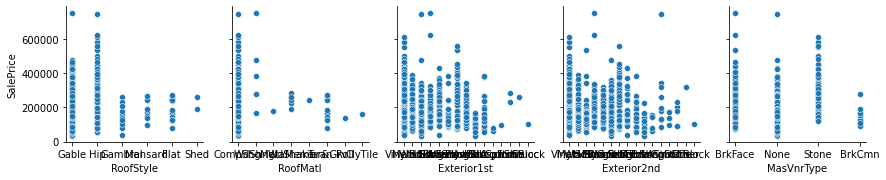

In [ ]:
sns.pairplot(df, x_vars=[ 'RoofStyle',	'RoofMatl','Exterior1st',	'Exterior2nd',	'MasVnrType'	], y_vars='SalePrice')


Pave Alley is higher

In [ ]:
df['Neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


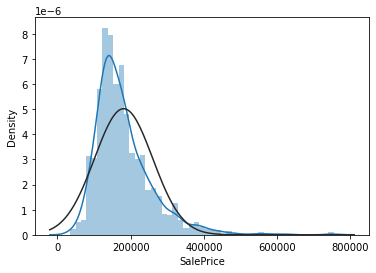

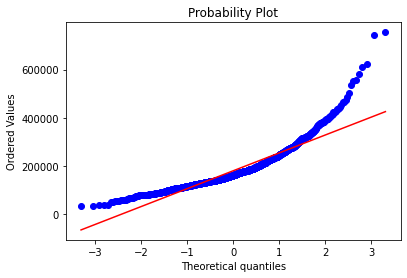

In [ ]:
from scipy.stats import norm
from scipy import stats
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

##Linear Regression with only Numerical Columns and NaN Removed

In [ ]:
dfNumeric=df._get_numeric_data()

In [ ]:
dfNumeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
dfNumeric['Age']=2020-dfNumeric['YearBuilt']

In [ ]:
dfNumeric['Age']

0        17
1        44
2        19
3       105
4        20
       ... 
1455     21
1456     42
1457     79
1458     70
1459     55
Name: Age, Length: 1460, dtype: int64

In [ ]:
dfclean=dfNumeric.dropna()

In [ ]:
dfclean=dfclean.drop('YearBuilt', axis=1)

In [ ]:
Y=dfclean['SalePrice']

In [ ]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [ ]:
X=dfclean.drop('SalePrice',axis=1)

In [ ]:
dfclean['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  51.,  50.,  70.,  91.,
        72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,  74.,
       115.,  61.,  48.,  52., 100.,  24.,  89.,  63.,  76.,  81.,  95.,
        69.,  21.,  32.,  78., 121., 122.,  40.,  73.,  77.,  64.,  94.,
       105.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,  92., 134.,
        86.,  62., 141.,  97.,  54.,  41.,  79., 174.,  99.,  83.,  43.,
       103.,  93.,  30., 129., 140.,  35.,  37., 118.,  87., 116., 150.,
       111.,  49.,  96.,  59.,  36.,  56., 102.,  38., 109., 130.,  67.,
        53., 137.,  58., 106., 104.,  42.,  39., 144.,  45., 114., 128.,
       149., 313., 168., 182., 160., 152., 124.,  46.])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
lrModel = linear_model.LinearRegression()

In [ ]:
X_train['LotFrontage'].unique()

array([ 60., 110.,  72.,  43.,  94.,  50.,  21.,  74., 120.,  71.,  80.,
        68.,  85.,  79.,  63.,  78.,  67.,  57.,  49.,  65.,  91.,  51.,
        44.,  93.,  96.,  76.,  24.,  53., 160.,  90.,  58.,  92.,  37.,
       104.,  62.,  70.,  75.,  64., 121., 108.,  34.,  59.,  97.,  41.,
        88.,  69.,  52., 100.,  30.,  47.,  84.,  40.,  82.,  87., 124.,
       174.,  99., 140.,  55.,  66.,  48.,  95., 130.,  86.,  42., 122.,
        32., 134.,  61.,  73.,  36.,  89., 101.,  77., 182., 144., 103.,
       137.,  35.,  81., 102.,  98., 115., 107.,  83., 149., 112.,  56.,
       111., 105., 128., 129.,  46.,  54., 114., 118., 168., 150.,  45.,
        39., 116., 313.])

In [ ]:
lrModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lrModel.predict(X_test)

In [ ]:
print('Coef=', lrModel.coef_)
print('Int=', lrModel.intercept_)
print('MSE', mean_squared_error(Y_test, Y_pred))
print('R^2=',r2_score(Y_test, Y_pred))

Coef= [-1.20865013e+00 -2.02778108e+02 -1.42343989e+02  6.81982675e-01
  1.79988165e+04  6.01164669e+03  7.78189219e+01  3.85472875e+01
  9.58554142e+00 -2.98851537e+00 -4.15517109e+00  2.44185496e+00
  2.18726495e+01  1.85242972e+01 -2.81186638e+00  3.75850804e+01
  1.01928222e+04  3.93882716e+03  5.12372948e+03 -1.99921829e+03
 -1.12247185e+04 -2.46159631e+04  4.71440673e+03  1.02748952e+03
 -4.81751700e+01  1.86516831e+04 -4.54159334e+00  1.54180387e+01
  2.89120314e+01  1.44511348e+01  2.59392055e+01  5.46907068e+01
 -6.80798204e+01 -1.60328737e-02 -1.32933957e+02 -3.60634821e+01
 -3.75012630e+02]
Int= -32704.172455007007
MSE 1461206588.7495537
R^2= 0.7870771244099769


In [ ]:
import numpy as np
np.array(Y_test)

array([176000, 142500, 139500,  84900, 164000,  40000, 205000, 153000,
       167500, 175000, 290000, 180000, 316600, 135000, 210000, 485000,
       113000, 209500, 148000, 303477, 140000, 105000, 200000, 256000,
       369900, 278000, 285000, 248328, 326000, 116000, 225000, 107000,
       173733, 228500, 155000, 372500, 135500, 167000, 196500, 101800,
        68400, 438780, 124500, 318000, 147000, 159434, 176000, 198500,
       153000, 337500, 157000, 130000, 155000, 132500, 135000, 149000,
       169000, 180000, 129900, 257500, 158000, 157000, 163000, 325624,
       280000, 104900, 251000, 140000, 340000, 113000, 263000, 325000,
       143000, 307000, 119750, 158000, 177000, 245500, 202900, 153500,
       156000, 230000, 144000, 118000, 156000, 160000, 139400, 164000,
       242000, 345000, 105000, 325000, 130000, 165400, 241000, 147000,
       129000, 122500, 109008, 120500,  78000,  95000, 415298, 140000,
       283463, 139000, 174000, 128200, 191000, 278000, 163000, 320000,
      

In [ ]:
Y_pred

array([175311.34836086, 154921.91725829, 153437.56264909,  95556.28225346,
       229076.05800642,  67829.06649861, 239222.48380361, 149954.82087848,
       166031.28561419, 188287.97775336, 303472.22669552, 228894.40977336,
       304007.01174633, 135294.45566957, 162337.0301515 , 389392.34342776,
        90978.62997738, 221005.53919186, 126276.97036238, 294174.69252149,
       130360.36634822,  89382.21445106, 229953.66639364, 265156.63749062,
       325787.33101984, 241595.01786226, 302045.2811534 , 235875.79324922,
       335768.71295309, 108497.56853569, 272341.92054929,  80779.79242051,
       150111.36742402, 246542.60191693, 184648.73792467, 294320.89678977,
        91730.67633401, 177231.18872406, 211530.1494728 ,  84823.07218202,
        82580.73223028, 412718.51506552, 133215.04632321, 286209.06026366,
       167156.46164006, 108643.48318578, 190265.82011949, 226626.44134183,
       167495.2923755 , 325216.05935019, 148010.88822745, 191226.16155949,
       181006.40315065, 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


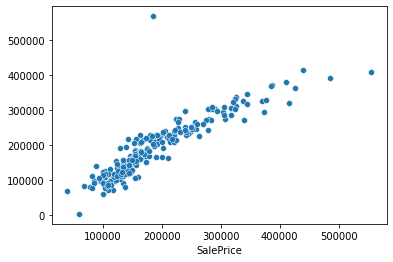

In [ ]:
sns.scatterplot(Y_test, Y_pred)

##Linear Regression with only Numerical Columns and NaN values as Means

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
dfNumeric

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,17
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,44
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,19
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,105
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,21
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,42
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,79
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,70


In [ ]:
dfNumeric['LotArea'].unique()

array([ 8450,  9600, 11250, ..., 17217, 13175,  9717])

In [ ]:
dfNumeric.drop('YearBuilt',axis=1)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age
0,1,60,65.0,8450,7,5,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,17
1,2,20,80.0,9600,6,8,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,44
2,3,60,68.0,11250,7,5,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,19
3,4,70,60.0,9550,7,5,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,105
4,5,60,84.0,14260,8,5,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,21
1456,1457,20,85.0,13175,6,6,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,42
1457,1458,70,66.0,9042,7,9,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,79
1458,1459,20,68.0,9717,5,6,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,70


In [ ]:
dfNumericMean=dfNumeric.fillna(dfNumeric.mean())

In [ ]:
Y=dfNumericMean['SalePrice']

In [ ]:
X=dfNumericMean.drop('SalePrice',axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
lrModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lrModel.predict(X_test)

In [ ]:
print('Coef=', lrModel.coef_)
print('Int=', lrModel.intercept_)
print('MSE=',mean_squared_error(Y_test, Y_pred))
print('R^2=', r2_score(Y_test, Y_pred))

Coef= [-5.24548014e-01 -1.29625554e+02  8.95937715e+01  4.49976516e-01
  1.48385865e+04  5.74114714e+03  1.53382518e+02  1.00505359e+02
  2.86075499e+01  2.07698606e+01 -6.66457067e-01  2.28234052e+00
  2.23857440e+01  2.31098706e+01  3.24824816e+01 -2.85175284e+01
  2.70748238e+01  3.49906181e+03 -2.29657112e+03  1.16604184e+03
 -2.85417608e+03 -1.20337242e+04 -1.58537099e+04  4.56961008e+03
  3.94283717e+03  1.65893431e+02  2.17803632e+03  1.57557449e+01
  2.13044468e+01 -1.15743881e+01  2.12637962e-01  1.12327669e+01
  2.79920715e+01  8.65633352e+01 -1.38579790e+00 -1.88595004e+02
 -7.30790318e+02 -1.53382518e+02]
Int= 588268.9109733221
MSE= 2466967050.411842
R^2= 0.6021060218120116


In [ ]:
import numpy as np
np.array(Y_test)

array([ 94750, 108000, 137500, 197000, 120500, 611657,  92900, 135000,
       140000, 153500, 156000, 252000, 147000, 133500, 172500, 123600,
       153500, 178400, 119200, 155000, 403000, 241500, 124000, 385000,
       215000, 162500, 208300, 191000, 164700, 337500, 192000, 134000,
       225000, 115000, 119500, 165000, 187000, 119500, 239000, 194000,
       120500, 139000, 190000, 216837, 130000, 147400, 139950, 276000,
       359100, 158900,  91300, 168000, 124000, 195000, 162000, 190000,
       169000, 199900,  79500, 168000, 223500, 191000, 190000, 170000,
       271900, 179200, 143000, 160000, 410000, 112500,  75000, 315000,
       161500,  66500, 151000, 152000, 116050, 137000, 126000, 136000,
       318000, 245350, 147000, 149000, 385000,  79000, 200000, 200000,
       185000, 475000, 159500, 257500, 230000, 176000, 217500, 115000,
       114500, 154000, 179900, 142125, 175000, 175000, 124000, 148500,
       260000, 135000,  52500, 248000, 315000, 208900, 211000, 240000,
      

In [ ]:
Y_pred

array([108448.97754418,  88985.49713316, 170244.52262048, 229981.31703927,
       101676.44929419, 412721.3093319 ,  34241.74435415, 157245.11505842,
       165933.40836841, 172056.78012592, 140237.65763893, 261324.00180675,
       163321.7024204 , 115043.27674814, 183002.86367565, 105610.62803406,
       143041.88895983, 185418.90803387, 137212.31978222, 162448.32068259,
       331859.93658478, 212888.76824835, 110982.36152666, 391773.63343087,
       230380.60791741, 173817.2301098 , 171388.35104816, 220226.24691906,
       155671.18228824, 316511.15593602, 207573.07285513, 143491.06921988,
       233384.38302104, 108491.27705087, 133461.57062087, 153349.80558492,
       195177.77064642, 120117.70009513, 284237.01635209, 181901.14060979,
        98891.26255656, 133431.72986188, 191416.47184922, 242750.80035003,
       118572.07047659, 140757.86958986, 140924.22008534, 309352.60194254,
       284374.70895558, 171191.3412597 ,  85698.80355273, 180915.90442021,
       111769.3101291 , 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


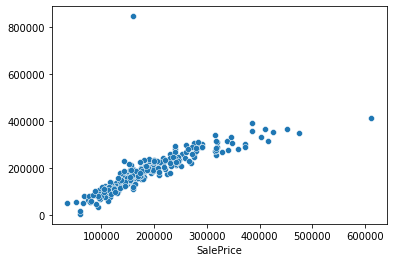

In [ ]:
sns.scatterplot(Y_test, Y_pred)

In [ ]:
reg=LinearRegression().fit(X_train,Y_train)

In [ ]:
reg.score(X_test,Y_test)

0.6021060218120116

##Linear Regression with Label Encoding on Columns with String Values

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df2=df

In [ ]:
df2.MSZoning=LabelEncoder().fit_transform(df2.MSZoning)

In [ ]:
df2.Street=LabelEncoder().fit_transform(df2.Street)
df2.LandContour=LabelEncoder().fit_transform(df2.LandContour)
df2.Utilities=LabelEncoder().fit_transform(df2.Utilities)
df2.LotConfig=LabelEncoder().fit_transform(df2.LotConfig)
df2.LandSlope=LabelEncoder().fit_transform(df2.LandSlope)
df2.Neighborhood=LabelEncoder().fit_transform(df2.Neighborhood)
df2.Condition1=LabelEncoder().fit_transform(df2.Condition1)
df2.Condition2=LabelEncoder().fit_transform(df2.Condition2)
df2.BldgType=LabelEncoder().fit_transform(df2.BldgType)
df2.HouseStyle=LabelEncoder().fit_transform(df2.HouseStyle)
df2.RoofStyle=LabelEncoder().fit_transform(df2.RoofStyle)
df2.RoofMatl=LabelEncoder().fit_transform(df2.RoofMatl)
df2.Exterior1st=LabelEncoder().fit_transform(df2.Exterior1st)
df2.Exterior2nd=LabelEncoder().fit_transform(df2.Exterior2nd)

df2.ExterQual=LabelEncoder().fit_transform(df2.ExterQual)
df2.ExterCond=LabelEncoder().fit_transform(df2.ExterCond)
df2.Foundation=LabelEncoder().fit_transform(df2.Foundation)



df2.Heating=LabelEncoder().fit_transform(df2.Heating)
df2.CentralAir=LabelEncoder().fit_transform(df2.CentralAir)

df2.KitchenQual=LabelEncoder().fit_transform(df2.KitchenQual)
df2.Functional=LabelEncoder().fit_transform(df2.Functional)



df2.PavedDrive=LabelEncoder().fit_transform(df2.PavedDrive)



df2.SaleType=LabelEncoder().fit_transform(df2.SaleType)
df2.SaleCondition=LabelEncoder().fit_transform(df2.SaleCondition)




In [ ]:
df2=df2.fillna('None')

In [ ]:
df2.MasVnrType=LabelEncoder().fit_transform(df2.MasVnrType)
df2.BsmtQual=LabelEncoder().fit_transform(df2.BsmtQual)
df2.BsmtCond=LabelEncoder().fit_transform(df2.BsmtCond)
df2.BsmtExposure=LabelEncoder().fit_transform(df2.BsmtExposure)
df2.Electrical=LabelEncoder().fit_transform(df2.Electrical)
df2.BsmtFinType1=LabelEncoder().fit_transform(df2.BsmtFinType1)
df2.BsmtFinType2=LabelEncoder().fit_transform(df2.BsmtFinType2)
df2.FireplaceQu=LabelEncoder().fit_transform(df2.FireplaceQu)
df2.GarageType=LabelEncoder().fit_transform(df2.GarageType)
df2.GarageFinish=LabelEncoder().fit_transform(df2.GarageFinish)
df2.MiscFeature=LabelEncoder().fit_transform(df2.MiscFeature)
df2.GarageCond=LabelEncoder().fit_transform(df2.GarageCond)
df2.GarageQual=LabelEncoder().fit_transform(df2.GarageQual)
df2.Fence=LabelEncoder().fit_transform(df2.Fence)
df2.PoolQC=LabelEncoder().fit_transform(df2.PoolQC)
df2.Alley=LabelEncoder().fit_transform(df2.Alley)
df2.HeatingQC=LabelEncoder().fit_transform(df2.HeatingQC)
df2.LotShape=LabelEncoder().fit_transform(df2.LotShape)

In [ ]:
df2=df2.replace('None',0)

In [ ]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,0,6,0,953,953,1,...,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,4,3,0,790,5,163,589,1542,1,...,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,275,6,0,877,1152,1,...,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,...,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125


In [ ]:
X = df2.drop('SalePrice',axis=1).values

In [ ]:
Y=df2['SalePrice']

In [ ]:
X

array([[1.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       [2.000e+00, 2.000e+01, 3.000e+00, ..., 2.007e+03, 8.000e+00,
        4.000e+00],
       [3.000e+00, 6.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.459e+03, 2.000e+01, 3.000e+00, ..., 2.010e+03, 8.000e+00,
        4.000e+00],
       [1.460e+03, 2.000e+01, 3.000e+00, ..., 2.008e+03, 8.000e+00,
        4.000e+00]])

In [ ]:
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [ ]:
finalModel=LinearRegression().fit(X,Y)

In [ ]:
Ypred = finalModel.predict(X)

In [ ]:
print('Coef=', finalModel.coef_)
print('Int=', finalModel.intercept_)
print('MSE=',mean_squared_error(Y, Ypred))
print('R^2=',r2_score(Y, Ypred))

Coef= [-1.79342732e+00 -1.05746867e+02 -5.79527888e+02 -3.64748880e+01
  3.73056994e-01  3.16645241e+04  3.60579287e+03 -7.03616585e+02
  3.19596118e+03 -5.54576465e+04  2.50594911e+02  5.56354023e+03
  3.94033080e+02 -7.29590687e+02 -9.27366843e+03 -2.30675634e+03
 -1.23697062e+03  1.10610827e+04  5.36547698e+03  2.03515477e+02
 -1.60260007e+01  2.04719351e+03  5.16712711e+03 -9.79425896e+02
  3.34585315e+02  4.71758095e+03  3.30298609e+01 -9.92528713e+03
  8.55386185e+02  9.57212234e+02 -4.07057329e+03  1.12507179e+03
 -3.56798305e+03 -6.57008899e+02  3.34801778e+00  7.95487706e+02
  6.02512122e+00 -4.38771845e+00  4.98542067e+00 -2.41993224e+03
 -6.82770324e+02  6.07882674e+02 -4.44638327e+02  2.50657578e+01
  2.18466125e+01 -2.62448113e+01  2.06675589e+01  6.68377664e+03
  3.02964060e+01  3.50887741e+03 -2.46951528e+01 -4.15448158e+03
 -1.41346796e+04 -8.27975440e+03  4.00964573e+03  3.65971504e+03
  4.88480687e+03 -1.54216565e+03  5.25533622e+02 -7.93711759e+00
 -8.81979929e+02  1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [ ]:
lrModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lrModel.predict(X_test)

In [ ]:
print('Coefficients:', lrModel.coef_)
print('Intercept:', lrModel.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-1.56391274e+00 -1.24310763e+02 -1.92761297e+03 -4.97092829e+01
  3.91476860e-01  2.64370879e+04  6.32809583e+02 -4.13720904e+02
  1.39467319e+03 -6.54369341e+04  6.35252659e+02  2.64268886e+03
  2.69275374e+02  7.97129465e+02 -8.43140435e+02 -2.33790855e+03
 -8.38800039e+02  1.10453969e+04  3.57118710e+03  1.07125589e+02
  6.21700688e+01  1.49587192e+03  8.44283603e+03 -1.44874158e+03
  3.92940919e+02  6.72692720e+03  3.83429812e+01 -1.22168798e+04
  4.09022418e+02  7.13199453e+02 -4.10673703e+03  2.17266390e+03
 -4.62527452e+03 -1.04398918e+03  7.31138723e-01  7.44266185e+01
  5.87062990e+00 -4.17964699e+00  2.42212168e+00 -1.19936687e+03
 -2.61887228e+02  5.85493726e+03 -9.10860050e+02  2.92997025e+01
  2.15817091e+01 -2.60669032e+01  2.48145083e+01  7.69219157e+03
  5.35742276e+03  5.64969114e+03  2.36962644e+03 -4.79762292e+03
 -1.39897579e+04 -6.28231883e+03  3.24446165e+03  4.26598323e+03
  3.71638798e+03 -3.18511222e+03  7.08767438e+02 -6.49999587e+00
 -4.7589246

In [ ]:
np.array(Y_test)

array([160000, 168500, 149900, 214900, 179900, 200141, 110000, 245000,
       260000, 129500, 135000, 315750, 318061, 160000, 172500, 217000,
       290000, 176000, 121600, 175000, 190000, 201800, 172000,  91300,
       250000, 119000,  67000, 118500, 335000, 196000, 185500, 151000,
       177000, 121500, 144500, 225000,  55993, 131000, 244000, 119900,
       130500, 337000, 279500, 169000, 260000, 128000, 195000, 280000,
       153500, 315000, 170000, 137000, 232000, 130000, 144500, 194000,
       120000, 236000, 199900, 340000, 127000, 230000, 123000, 119750,
       109900, 183900, 200000,  85000, 225000, 140000, 189000, 272000,
       176000, 115000, 122500, 117000, 173000,  85500, 160000,  87000,
       218000, 213000, 150000, 159500, 260000, 120500, 153000, 197900,
       255000, 187000, 403000, 163500, 170000, 155000, 745000, 264132,
       190000, 199900, 148000, 167900, 105000, 128000, 166000, 242000,
       112500, 239900, 206000, 187500,  60000, 278000, 129900, 164000,
      

In [ ]:
Y_pred

array([127313.46201946, 210918.74012893, 111513.67701804, 223848.53316345,
       166577.4622698 , 208484.77423797, 122808.75565942, 251708.73899658,
       281413.30574312, 184983.98277444, 112328.99205069, 284660.92021347,
       296141.20187358, 122295.0939897 , 211652.77204793, 199359.56741589,
       299949.72852342, 151966.13589471, 104207.06533202, 213472.46173998,
       188541.14803609, 244449.83142796, 189858.43399479, 115370.45370414,
       268657.70387666,  91044.70569323,  53255.98645416, 104846.89246565,
       362105.33332701, 192955.18096572, 206056.63398232, 176155.7970276 ,
       177784.30588511, 171996.68631445, 164403.38729769, 199393.45888189,
       116124.51045398, 160674.66109578, 217611.76427526, 108247.52518278,
       117082.29982545, 313586.06496122, 256864.10460428, 209320.34574479,
       247177.98466688, 150617.61524202, 198782.34223567, 290086.9576265 ,
       152169.17246813, 325598.33563985, 174270.77227674, 203630.07783651,
       239431.65454268, 1

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


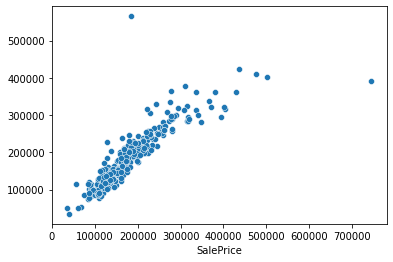

In [ ]:
sns.scatterplot(Y_test, Y_pred)

##Lasso Regression on Label Encoded Data from Above

In [ ]:
lassoReg=linear_model.Lasso(alpha=100,max_iter=100,tol=0.1)
lassoReg.fit(X,Y)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [ ]:
Y_pred = lassoReg.predict(X)

In [ ]:
print('Coef=', lassoReg.coef_)
print('Int=', lassoReg.intercept_)
print('MSE=',
       mean_squared_error(Y, Ypred))
print('R^2=',
       r2_score(Y, Ypred))

Coef= [ 1.13137343e-01 -1.60964236e+02  5.05041586e+02 -4.76895309e+01
  3.92782015e-01  0.00000000e+00 -1.30918099e+03 -9.44248195e+01
  2.59212335e+03 -0.00000000e+00  1.13288149e+02  5.37308287e+03
  2.90513091e+02 -1.06930861e+03 -7.89884770e+03 -2.91155175e+03
 -1.98975833e+03  1.38219130e+04  4.74158661e+03  4.05350858e+02
  1.72528125e+02  2.37330358e+03  5.95610426e+03 -7.99455215e+02
  8.44490206e+01  4.85066523e+03  4.03739687e+01 -1.33841666e+04
  6.85580164e+02  2.07118629e+03 -5.92934477e+03  9.59161059e+02
 -3.89097502e+03 -1.01186763e+03  1.64521091e+01  5.24494639e+01
  1.47124442e+01  5.83922053e+00  3.76061677e+00 -0.00000000e+00
 -5.45586044e+02  0.00000000e+00  0.00000000e+00  3.79372409e+01
  4.88044637e+01  1.06160695e+01  6.00796083e+00  3.81449260e+03
 -0.00000000e+00 -8.31683835e+02 -1.74037302e+03 -3.67817340e+03
 -4.79337386e+02 -4.23855946e+03  2.30992091e+03  3.08557019e+03
  5.58503716e+03 -9.24860562e+02  1.38621488e+03 -6.02082204e-01
  1.01647764e+03  5

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
lassoReg.fit(X_train, Y_train)
Y_pred = lassoReg.predict(X_test)

In [ ]:
print('Coef=', lassoReg.coef_)
print('Int=', lassoReg.intercept_)
print('MSE= ', mean_squared_error(Y_test, Y_pred))
print('R^2=', r2_score(Y_test, Y_pred))

Coef= [-4.64242531e-01 -1.40801487e+02  4.97552698e+02 -3.46223809e+01
  4.84407454e-01  0.00000000e+00 -3.13060705e+03 -4.47214172e+02
  2.37341578e+03 -0.00000000e+00  2.82507741e+02  9.25489868e+03
  2.96142894e+02 -7.65974284e+01 -3.48627964e+03 -2.90537443e+03
 -2.53849221e+03  1.44366722e+04  4.38425916e+03  3.86239280e+02
  1.45950930e+02  3.77840657e+03  3.72360832e+03 -8.74269362e+02
 -1.07947346e+02  5.25503819e+03  4.19595306e+01 -1.06564278e+04
  2.69333936e+02  3.29899643e+03 -5.92125660e+03  5.70957988e+02
 -4.24877455e+03 -1.33818012e+03  9.89951247e+00  8.96782077e+02
  1.01892354e+01  4.23031314e+00  2.52459577e+00 -0.00000000e+00
 -5.46499033e+02  0.00000000e+00  1.27819260e+02  4.40925133e+01
  5.03857590e+01 -6.24520758e-01  6.28300182e+00  4.57660299e+03
  0.00000000e+00  3.88233511e+02 -1.62442876e+03 -4.58538839e+03
 -9.82803735e+01 -3.93236025e+03  2.32211918e+03  3.57479966e+03
  3.10535987e+03 -3.22552851e+02  1.63686629e+03  3.66854163e-02
  9.89243658e+02  6

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


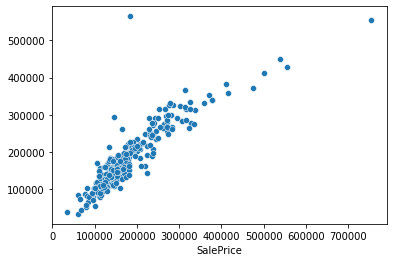

In [ ]:
sns.scatterplot(Y_test, Y_pred)

In [ ]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,NaN,Reg,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,BrkFace,196.0,2,4,2,Gd,TA,No,GLQ,706,Unf,0,150,856,1,...,1,SBrkr,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,2,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,NaN,Reg,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,None,0.0,3,4,1,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,1,...,1,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,2,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,NaN,IR1,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,BrkFace,162.0,2,4,2,Gd,TA,Mn,GLQ,486,Unf,0,434,920,1,...,1,SBrkr,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,2,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,NaN,IR1,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,None,0.0,3,4,0,TA,Gd,No,ALQ,216,Unf,0,540,756,1,...,1,SBrkr,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,2,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,NaN,IR1,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,BrkFace,350.0,2,4,2,Gd,TA,Av,GLQ,655,Unf,0,490,1145,1,...,1,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,2,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,NaN,Reg,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,None,0.0,3,4,2,Gd,TA,No,Unf,0,Unf,0,953,953,1,...,1,SBrkr,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,2,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,NaN,Reg,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,Stone,119.0,3,4,1,Gd,TA,No,ALQ,790,Rec,163,589,1542,1,...,1,SBrkr,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,2,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,NaN,Reg,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,None,0.0,0,2,4,TA,Gd,No,GLQ,275,Unf,0,877,1152,1,...,1,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,2,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,NaN,Reg,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,None,0.0,3,4,1,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,1,...,1,FuseA,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,2,366,0,112,0,0,0,NaN,NaN,NaN,0,4,2010,8,4,142125


##Linear Regression with Dummy Varables Standardized

In [ ]:
df = pd.read_csv(path)

In [ ]:
df = pd.get_dummies(df)
df=df.dropna()

In [ ]:
x=df.drop('SalePrice',axis=1)
y=df['SalePrice']
x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
x

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageFinish_Unf,GarageQual_Ex,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Fa,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,0,0,0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,0,0,0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
Ypred = model.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Ypred)

MSE


430253858.42577094

In [ ]:
xstandard=np.array(x)

In [ ]:
ystandard=np.array(y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))
print(scaler.fit([y]))

StandardScaler(copy=True, with_mean=True, with_std=True)
StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
df['SalePrice'].describe()

count      1121.000000
mean     185506.152542
std       82999.159004
min       35311.000000
25%      131000.000000
50%      164900.000000
75%      219500.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
df.columns.get_loc("SalePrice")

37

In [ ]:
print(scaler.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
model_data = scaler.fit_transform(df)

In [ ]:
y = model_data[:, 37]

In [ ]:
y

array([ 0.27716076, -0.04828893,  0.45796615, ...,  0.97627492,
       -0.52290307, -0.45811447])

In [ ]:
x = np.delete(model_data, 37, axis=1)

In [ ]:
x

array([[-1.72580691,  0.09229529, -0.23357027, ..., -0.12774635,
         0.49134255, -0.34461932],
       [-1.72342925, -0.86569565,  0.38483378, ..., -0.12774635,
         0.49134255, -0.34461932],
       [-1.72105159,  0.09229529, -0.10988946, ..., -0.12774635,
         0.49134255, -0.34461932],
       ...,
       [ 1.73844606,  0.33179303, -0.19234334, ..., -0.12774635,
         0.49134255, -0.34461932],
       [ 1.74082372, -0.86569565, -0.10988946, ..., -0.12774635,
         0.49134255, -0.34461932],
       [ 1.74320138, -0.86569565,  0.17869909, ..., -0.12774635,
         0.49134255, -0.34461932]])

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
Ypred = model.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Ypred)

MSE


0.06251242380003136

##Linear Regression with Labels Encoded Standardized

In [ ]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,0,6,0,953,953,1,...,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,4,3,0,790,5,163,589,1542,1,...,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,275,6,0,877,1152,1,...,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,...,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125


In [ ]:
print(scaler.fit(df2))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
model_data = scaler.fit_transform(df2)

In [ ]:
model_data

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.34727322],
       [-1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.00728832],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  0.31386709,
         0.2085023 ,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.48852299],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.42084081]])

In [ ]:
y = model_data[:, -1]

In [ ]:
x = np.delete(model_data, -1, axis=1)

In [ ]:
x

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276, -0.04553194, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
Ypred = model.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Ypred)

MSE


0.14686276600629355

##Lasso Regression with Dummy Variables Standardized

In [ ]:
print(scaler.fit(df))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
model_data = scaler.fit_transform(df)

In [ ]:
model_data = scaler.fit_transform(df)

In [ ]:
y = model_data[:, 37]

In [ ]:
y

array([ 0.27716076, -0.04828893,  0.45796615, ...,  0.97627492,
       -0.52290307, -0.45811447])

In [ ]:
x = np.delete(model_data, 37, axis=1)

In [ ]:
x

array([[-1.72580691,  0.09229529, -0.23357027, ..., -0.12774635,
         0.49134255, -0.34461932],
       [-1.72342925, -0.86569565,  0.38483378, ..., -0.12774635,
         0.49134255, -0.34461932],
       [-1.72105159,  0.09229529, -0.10988946, ..., -0.12774635,
         0.49134255, -0.34461932],
       ...,
       [ 1.73844606,  0.33179303, -0.19234334, ..., -0.12774635,
         0.49134255, -0.34461932],
       [ 1.74082372, -0.86569565, -0.10988946, ..., -0.12774635,
         0.49134255, -0.34461932],
       [ 1.74320138, -0.86569565,  0.17869909, ..., -0.12774635,
         0.49134255, -0.34461932]])

In [ ]:
lassoReg=linear_model.Lasso(alpha=100,max_iter=100,tol=0.1)
lassoReg.fit(x,y)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [ ]:
Y_pred = lassoReg.predict(x)

In [ ]:

print('MSE=', mean_squared_error(y, Y_pred))


MSE= 1.0


##Lasso Regression with Label Encoded Data Standardized

In [ ]:
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,4,3,2,706,6,0,150,856,1,...,1,5,856,854,0,1710,1,0,2,1,3,1,2,8,6,0,3,1,2003.0,2,2,548,5,5,2,0,61,0,0,0,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,4,1,0,978,6,0,284,1262,1,...,1,5,1262,0,0,1262,0,1,2,0,3,1,3,6,6,1,5,1,1976.0,2,2,460,5,5,2,298,0,0,0,0,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,4,2,2,486,6,0,434,920,1,...,1,5,920,866,0,1786,1,0,2,1,3,1,2,6,6,1,5,1,2001.0,2,2,608,5,5,2,0,42,0,0,0,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,4,1,3,0,216,6,0,540,756,1,...,1,5,961,756,0,1717,1,0,1,0,3,1,2,7,6,1,2,5,1998.0,3,3,642,5,5,2,0,35,272,0,0,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,4,0,2,655,6,0,490,1145,1,...,1,5,1145,1053,0,2198,1,0,2,1,4,1,2,9,6,1,5,1,2000.0,2,3,836,5,5,2,192,84,0,0,0,0,3,4,1,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,1,3,3,0,4,0,8,2,2,0,5,6,5,1999,2000,1,1,12,13,2,0.0,3,4,2,2,4,3,6,0,6,0,953,953,1,...,1,5,953,694,0,1647,0,0,2,1,3,1,3,7,6,1,5,1,1999.0,2,2,460,5,5,2,0,40,0,0,0,0,3,4,1,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,1,3,3,0,4,0,14,2,2,0,2,6,6,1978,1988,1,1,9,10,3,119.0,3,4,1,2,4,3,0,790,5,163,589,1542,1,...,1,5,2073,0,0,2073,1,0,2,0,3,1,3,7,2,2,5,1,1978.0,3,2,500,5,5,2,349,0,0,0,0,0,3,2,1,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,1,3,3,0,4,0,6,2,2,0,5,7,9,1941,2006,1,1,5,5,2,0.0,0,2,4,4,1,3,2,275,6,0,877,1152,1,...,1,5,1188,1152,0,2340,0,0,2,0,4,1,2,9,6,2,2,1,1941.0,2,1,252,5,5,2,0,60,0,0,0,0,3,0,3,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,1,3,3,0,4,0,12,2,2,0,2,5,6,1950,1996,3,1,8,8,2,0.0,3,4,1,4,4,2,2,49,5,1029,0,1078,1,...,1,0,1078,0,0,1078,1,0,1,0,2,1,2,5,6,0,3,1,1950.0,3,1,240,5,5,2,366,0,112,0,0,0,3,4,1,0,4,2010,8,4,142125


In [ ]:
print(scaler.fit(df2))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
model_data = scaler.fit_transform(df2)

In [ ]:
model_data

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.34727322],
       [-1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.00728832],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.31386709,
         0.2085023 ,  0.53615372],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  0.31386709,
         0.2085023 ,  1.07761115],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.48852299],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.31386709,
         0.2085023 , -0.42084081]])

In [ ]:
y = model_data[:, -1]

In [ ]:
x = np.delete(model_data, -1, axis=1)

In [ ]:
lassoReg=linear_model.Lasso(alpha=100,max_iter=100,tol=0.1)
lassoReg.fit(x,y)

Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [ ]:
Y_pred = lassoReg.predict(x)

In [ ]:
print('MSE=', mean_squared_error(y, Y_pred))

MSE= 0.9999999999999997


##Assignment 4 Random Forests and Gradient Boosting on Standardized Dummy Variable Data

In [ ]:
path = '/content/drive/MyDrive/data/train.csv'
df = pd.read_csv(path)
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
df = pd.get_dummies(df)
df=df.dropna()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
path='/content/drive/MyDrive/Assignment 4/test.csv'
test=pd.read_csv(path)

In [ ]:
test=pd.get_dummies(test)


In [ ]:
test

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoning_C (all),MSZoning_FV,MSZoning_RH,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,2,1,5,0,1961.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,0,0,1,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,1329.0,1329,0,0,1329,0.0,0.0,1,1,3,1,6,0,1958.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,928.0,928,701,0,1629,0.0,0.0,2,1,3,1,6,1,1997.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,324.0,926.0,926,678,0,1604,0.0,0.0,2,1,3,1,7,1,1998.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,1017.0,1280.0,1280,0,0,1280,0.0,0.0,2,0,2,1,5,0,1992.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,0,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,NaN,0.0,0.0,0,0,0,0,0,0,0,6,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1455,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,0,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1456,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,0,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1457,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,NaN,0.0,0.0,80,32,0,0,0,0,700,7,2006,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=271)

In [ ]:
df.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=290)

In [ ]:
lis=[]
for i in df.columns:
  if i not in test.columns:
    lis.append(i)

In [ ]:
lis=lis[1:]
lis

['Utilities_NoSeWa',
 'Condition2_RRAe',
 'Condition2_RRAn',
 'Condition2_RRNn',
 'HouseStyle_2.5Fin',
 'RoofMatl_ClyTile',
 'RoofMatl_Membran',
 'RoofMatl_Metal',
 'RoofMatl_Roll',
 'Exterior1st_ImStucc',
 'Exterior1st_Stone',
 'Exterior2nd_Other',
 'Heating_Floor',
 'Heating_OthW',
 'Electrical_Mix',
 'GarageQual_Ex',
 'PoolQC_Fa',
 'MiscFeature_TenC']

In [ ]:
for i in lis:
  df=df.drop(i,axis='columns')

In [ ]:
len(df.columns)
    

272

In [ ]:
len(test.columns)

271

In [ ]:
x=df.drop('SalePrice',axis=1)
y=df.SalePrice

Non-Standardized

In [ ]:
rfc=RandomForestClassifier()
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
test=test.dropna()

In [ ]:
prediction=rfc.predict(test)

In [ ]:
prediction

array([125000, 160000, 175000, ...,  88000, 223500, 170000])

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


12321849673.95272

In [ ]:
scaler.fit(df2)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
model_data = scaler.fit_transform(df2)

In [ ]:
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_C (all),MSZoning_FV,...,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Ex,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y,PoolQC_Ex,PoolQC_Gd,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0,0,...,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500,0,0,...,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125,0,0,...,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


Gradient Boosting on Non-Standardized Data

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
gradReg=GradientBoostingRegressor()

In [ ]:
gradReg.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction=gradReg.predict(test)
prediction

array([123951.70779966, 159179.44946035, 181616.42614714, ...,
        92285.81952346, 160395.32695055, 232982.30508269])

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


13123142802.841454

MinMax Standardized

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler().fit_transform(df)
y = mms[:, -1]
x = np.delete(mms, -1, axis=1)

In [ ]:
mms

array([[0.00000000e+00, 2.35294118e-01, 1.50684932e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [6.85400960e-04, 0.00000000e+00, 2.02054795e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.37080192e-03, 2.35294118e-01, 1.60958904e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98629198e-01, 2.94117647e-01, 1.54109589e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99314599e-01, 0.00000000e+00, 1.60958904e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.84931507e-01, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [ ]:
rfc.fit(x,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
mmstest=MinMaxScaler().fit_transform(test)

In [ ]:
prediction=rfc.predict(mmstest)

In [ ]:
prediction

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.10615521855486174

Gradient Boosting on MinMax Standardized

In [ ]:
gradReg.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction=gradReg.predict(test)
prediction

array([0.30557364, 0.30588371, 0.30397212, ..., 0.31587754, 0.32219061,
       0.30397212])

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.13651446035468248

In [ ]:
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.25,0.2,0.15,0.10], 'n_estimators':[120,150,200,250]}
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring=mse)
tuning.fit(x,y)
tuning.best_params_,tuning.best_score_

({'learning_rate': 0.25, 'n_estimators': 150}, -0.0032830079433159055)

In [ ]:
gradReg1=GradientBoostingRegressor(learning_rate=0.25,n_estimators=150)
gradReg1.fit(x,y)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.25, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=150,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction=gradReg1.predict(test)
prediction

array([0.22659982, 0.22659982, 0.22516779, ..., 0.23283546, 0.23263532,
       0.22516779])

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.11258339508294418

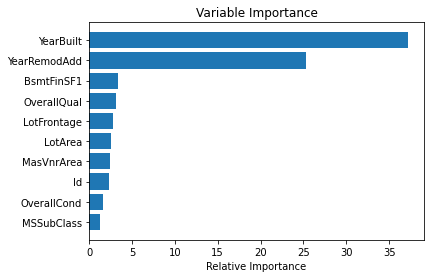

In [ ]:
#Code of relative importance plot from YouTube Channel UnfoldDataScience 
#(https://www.youtube.com/watch?v=OUk7Xvs8iS8&ab_channel=UnfoldDataScience)


importances=rfc.fit(x,y).feature_importances_
importances=100*(importances/importances.max())
sorted=np.argsort(importances[0:10])
pos=np.arange(sorted.shape[0])
plt.barh(pos,importances[sorted],align='center')
plt.yticks(pos, df.columns[sorted])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##Conclusion

Disclaimer: **I understand there are a lot of models to go through. I tried to make the MSEs lower in each one. My best performing models are the ones that were "Standardized." **

The data relationships between each of the features and the sale price of the houses are not quite linear relationships from the analyses I’ve done comparing a lot of features to the Sale prices individually. It will take a lot of work to try and get a model to come close to predicting the sale price to such pinpoint accuracy. However, the more features and data the model has to work with, the better it will do, as analyzed by the various linear regression models that I had done; particularly the ones with only numerical columns analyzed and the one with the string’s values made numeric so that all data may be taken into account. 


Another interesting take away from this assignment is that when I replaced the null values with the means of the columns, the Mean Squared Error had gotten even worse. This is because it may take away from the trends that the model had already picked up on, since some of the mean values may not have come close to the sale price listed for it in the analysis. Hence, more data may not always be good if the data is incorrect and does not go hand in hand with existing trends. 


From the two different regression models I had attempted, Linear and Lasso regressions, the Linear regression with all features transformed into numerical values had done the best. I am not quite sure why that is however, as I though Lasso was supposed to use more complex math to fit the data better. 
Another really important factor when doing regressions on data to create great machine learning algorithms is to standardize the data. If the data is not standardized, the Mean Squared errors are extremely high, which means there are very large errors in prediction. When standardized, the data is more compressed, and the trends are analyzed more effectively and efficiently. It had significantly brought down my errors, which I was worried were too high to be usable. 

Prompt:

If I worked for a real estate brokerage and wanted to use the best model to predict house prices, I would use the Linear regression with dummy variables which was standardized because it was the model with the lowest mean squared error. I was surprised to see my linear model perform better than the Lasso models, which I though would use more complex mathematics to predict the y values better. However, I think some data is just more suited for linear regression for better fitting in the model. 


##Assignment 4 Conclusion

If I was again advising a real estate brokerage firm in its attempt to employ machine learning methods, of the newer modelling methods that I examined in my study, I would employ the random forest regression model upon MinMax standardizing the data. The Mean squared error that this model had provided me was 0.10615521855486174, compared to 0.11258339508294418, which was the lowest of various combinations of different gradient boosting parameters in the models. 

Upon analyzing the parameters, the top five that effecting the sale prices the most were the Year Built, Year Remodeling was added, BsmtFinSF1, Overall Quality, and Lot Frontage, with the year built and year remodeling was added contributing significantly more than other features of the dataset, which makes sense. The newer the house looks; the more people want to buy it as it is more with today’s trends and may not have many problems down the line for the longest time. Lot size also contributes, as well as quality of the house.


###Assignment Part 2

##Ingest

In [ ]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip

# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [ ]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True


In [ ]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd


In [ ]:
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation


In [ ]:
# read data for the Boston Housing Study
# creating data frame restdata
path='/content/drive/MyDrive/data/boston.csv'
boston_input = pd.read_csv(path)


In [ ]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
0       Nahant  0.00632  18.0   2.31     0  ...    1  296     15.3   4.98  24.0
1   Swampscott  0.02731   0.0   7.07     0  ...    2  242     17.8   9.14  21.6
2   Swanpscott  0.02729   0.0   7.07     0  ...    2  242     17.8   4.03  34.7
3   Marblehead  0.03237   0.0   2.18     0  ...    3  222     18.7   2.94  33.4
4   Marblehead  0.06905   0.0   2.18     0  ...    3  222     18.7   5.33  36.2

[5 rows x 14 columns]
    neighborhood     crim   zn  indus  chas  ...  rad  tax  ptratio  lstat    mv
501     Winthrop  0.06263  0.0  11.93     0  ...    1  273     21.0   9.67  22.4
502     Winthrop  0.04527  0.0  11.93     0  ...    1  273     21.0   9.08  20.6
503     Winthrop  0.06076  0.0  11.93     0  ...    1  273     21.0   5.64  23.9
504     Winthrop  0.10959  0.0  11.93     0  ...    1  273     21.0   6.48  22.0
505     Winthrop  0.04741  0.0  11.93     0  .

In [ ]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  506 non-null    object 
 1   crim          506 non-null    float64
 2   zn            506 non-null    float64
 3   indus         506 non-null    float64
 4   chas          506 non-null    int64  
 5   nox           506 non-null    float64
 6   rooms         506 non-null    float64
 7   age           506 non-null    float64
 8   dis           506 non-null    float64
 9   rad           506 non-null    int64  
 10  tax           506 non-null    int64  
 11  ptratio       506 non-null    float64
 12  lstat         506 non-null    float64
 13  mv            506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [ ]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rooms    506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  mv       506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [ ]:
print('\nDescriptive statistics of the boston DataFrame:')
print(boston.describe())


Descriptive statistics of the boston DataFrame:
             crim          zn       indus  ...     ptratio       lstat          mv
count  506.000000  506.000000  506.000000  ...  506.000000  506.000000  506.000000
mean     3.613524   11.363636   11.136779  ...   18.455534   12.653063   22.528854
std      8.601545   23.322453    6.860353  ...    2.164946    7.141062    9.182176
min      0.006320    0.000000    0.460000  ...   12.600000    1.730000    5.000000
25%      0.082045    0.000000    5.190000  ...   17.400000    6.950000   17.025000
50%      0.256510    0.000000    9.690000  ...   19.050000   11.360000   21.200000
75%      3.677082   12.500000   18.100000  ...   20.200000   16.955000   25.000000
max     88.976200  100.000000   27.740000  ...   22.000000   37.970000   50.000000

[8 rows x 13 columns]


##EDA

In [ ]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [ ]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)


Data dimensions: (506, 13)


In [ ]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)


[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [ ]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)

In [ ]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)




Dimensions for model_data: (506, 13)


In [ ]:
x=model_data[:,1:]
y=model_data[:,:1]

In [ ]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -0.66660821,
        -1.45900038, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.98732948,
        -0.30309415, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ..., -0.80321172,
         1.17646583, -0.66905833]])

In [ ]:
y

array([[ 0.16037616],
       [-0.10125846],
       [ 1.32683049],
       [ 1.18511174],
       [ 1.49035213],
       [ 0.67274395],
       [ 0.04046029],
       [-0.04675124],
       [-0.65723202],
       [-0.3955974 ],
       [-0.82075365],
       [-0.3955974 ],
       [-0.09035701],
       [-0.23207576],
       [-0.4719075 ],
       [-0.28658298],
       [ 0.06226318],
       [-0.54821759],
       [-0.25387865],
       [-0.4719075 ],
       [-0.97337384],
       [-0.3192873 ],
       [-0.79895077],
       [-0.87526086],
       [-0.755345  ],
       [-0.94066952],
       [-0.64633057],
       [-0.84255654],
       [-0.45010461],
       [-0.16666711],
       [-1.07148682],
       [-0.87526086],
       [-1.01697961],
       [-1.02788106],
       [-0.98427529],
       [-0.3955974 ],
       [-0.27568153],
       [-0.16666711],
       [ 0.18217904],
       [ 0.90167424],
       [ 1.34863337],
       [ 0.44381366],
       [ 0.30209491],
       [ 0.23668626],
       [-0.14486423],
       [-0

##Linear Programming Model

In [ ]:
df=boston_input

In [ ]:
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [ ]:
X=df.drop('neighborhood',axis=1)
X=X.drop('mv',axis=1)

In [ ]:
Y=df.mv

In [ ]:
model=LinearRegression().fit(X,Y)

In [ ]:
Ypred = model.predict(X)

In [ ]:
print('MSE')
mean_squared_error(Y, Ypred)


MSE


22.02916527771459

##Lasso Regression Model

In [ ]:
from sklearn import linear_model
lassoReg=linear_model.Lasso(alpha=20,max_iter=100,tol=0.1)
lassoReg.fit(X,Y)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [ ]:
Y_pred = lassoReg.predict(X)

In [ ]:
print('MSE')
mean_squared_error(Y, Y_pred)

MSE


48.16468354731593

##Ridge Regression Model

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridgeReg=Ridge(alpha=10,max_iter=100,tol=0.1)

In [ ]:
ridgeReg.fit(X,Y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [ ]:
Y_pred = ridgeReg.predict(X)

In [ ]:
print('MSE')
mean_squared_error(Y, Y_pred)

MSE


22.87981121671962

##Linear Regression with Standardized Data

In [ ]:
model=LinearRegression().fit(x,y)

In [ ]:
Ypred = model.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Ypred)


MSE


0.2617977835754367

##Lasso Regression with Standardized data

In [ ]:
from sklearn import linear_model
lassoReg=linear_model.Lasso(alpha=20,max_iter=100,tol=0.1)
lassoReg.fit(x,y)

Lasso(alpha=20, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.1, warm_start=False)

In [ ]:
Y_pred = lassoReg.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Y_pred)


MSE


1.0

##Ridge Regression with Standardized Data

In [ ]:
ridgeReg=Ridge(alpha=10,max_iter=100,tol=0.1)
ridgeReg.fit(x,y)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=100, normalize=False,
      random_state=None, solver='auto', tol=0.1)

In [ ]:
Y_pred = ridgeReg.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, Y_pred)


MSE


0.26268863314001206

##Assignment 4 Random Forest Model and Gradient Boosting

In [ ]:
X=X.to_numpy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfr=RandomForestRegressor()
rfr.fit(X,Y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction=rfr.predict(X)

In [ ]:
print('MSE')
mean_squared_error(Y, prediction[:len(Y)])

MSE


1.3899232924901166

In [ ]:
rfr.fit(x,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
prediction=rfr.predict(x)

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.015994498045931907

In [ ]:
gradReg.fit(x,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
prediction=gradReg.predict(x)
prediction

array([ 3.48425315e-01, -7.53105777e-02,  1.26975005e+00,  1.21838452e+00,
        1.40708719e+00,  5.06727930e-01, -1.03599122e-01, -3.31855423e-01,
       -6.51823484e-01, -5.07687631e-01, -5.00328801e-01, -3.08401076e-01,
       -2.73461100e-01, -2.14670679e-01, -4.08016488e-01, -2.35650981e-01,
       -5.19935574e-02, -6.08507112e-01, -3.57612235e-01, -4.01734198e-01,
       -9.65786000e-01, -4.68672163e-01, -7.11764892e-01, -8.96670342e-01,
       -7.21427217e-01, -8.05535381e-01, -6.35501152e-01, -7.59084426e-01,
       -4.38017641e-01, -2.41248268e-01, -9.95837823e-01, -5.17689867e-01,
       -9.98712800e-01, -7.89644337e-01, -8.80725429e-01, -1.18808389e-01,
       -1.01100999e-01,  3.96743464e-02,  6.62416998e-02,  7.44270280e-01,
        1.27595202e+00,  6.36926536e-01,  1.69795009e-01,  1.69795009e-01,
       -1.44385584e-02, -2.07109958e-01, -2.13583743e-01, -5.32012666e-01,
       -6.95240428e-01, -4.25800124e-01, -1.88563894e-01, -5.17411953e-02,
        2.88970966e-01, -

In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.02422593924453951

Find best Parameters for Gradient Regression

In [ ]:
from sklearn.metrics import make_scorer

mse = make_scorer(mean_squared_error,greater_is_better=False)

from sklearn.model_selection import GridSearchCV
LR={'learning_rate':[0.25,0.2,0.15,0.10], 'n_estimators':[120,150,200,250]}
tuning=GridSearchCV(estimator=GradientBoostingRegressor(),param_grid=LR,scoring=mse)
tuning.fit(x,y)
tuning.best_params_,tuning.best_score_

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
 

({'learning_rate': 0.2, 'n_estimators': 150}, -0.2015345345891872)

Use Parameters to create best model

In [ ]:
gradReg2=GradientBoostingRegressor(learning_rate=0.2, n_estimators=150)

In [ ]:
gradReg2.fit(x,y)
prediction=gradReg2.predict(x)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print('MSE')
mean_squared_error(y, prediction[:len(y)])

MSE


0.006282295584926612

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


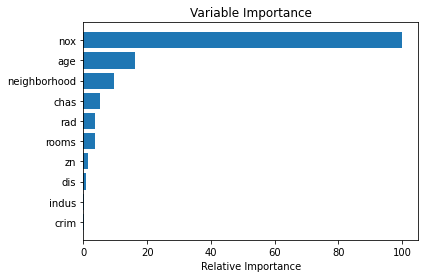

In [ ]:
#Code of relative importance plot from YouTube Channel UnfoldDataScience 
#(https://www.youtube.com/watch?v=OUk7Xvs8iS8&ab_channel=UnfoldDataScience)


importances=rfr.fit(x,y).feature_importances_
importances=100*(importances/importances.max())
sorted=np.argsort(importances[0:10])
pos=np.arange(sorted.shape[0])
plt.barh(pos,importances[sorted],align='center')
plt.yticks(pos, df.columns[sorted])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

##Conclusion

Throughout this assignment I understood the importance of standardizing the data before running the models so much so, that I went back to part one of the assignment which I thought I was done with, which I am glad I did. That had significantly improved my mean squared error outcomes which at first were through the roof, so much so that they would be deemed unusable in the real world due to errors being so high. I learned the importance of reducing error as that is the only way a model would be deemed useful in machine learning.

Even between these models, my linear model had done the best out of the three (Linear, Lasso, and Ridge Regressions) as it had the lowest mean squared value of 0.2617977835754367 compared to a mean squared error of 1.0 from the Lasso regression model and 0.26268863314001206 of the Ridge regression model, which had come quite close to my linear model. I believe there is a more linear relationship between these features and the house prices in this regard which made a linear regression model more effective and efficient in this use case.

Hence, if I were working for a real estate brokerage, I would use the linear regression model with standardized data to predict house prices as it would result in the lowest errors as stated by the low mean squared error value.

##Assignment 4 Conclusion

If I was advising a real estate brokerage firm in its attempt to employ machine learning methods, of the newer modelling methods that I examined in my study, I would employ the Gradient Regression model as it has given me the lowest Mean Squared Error Score by far of 0.006282295584926612. For this gradient regression model, I had chose parameters which included a learning rate of 0.20 and n_estimatores of 150 to give me the best result out of choices of [0.25,0.2,0.15,0.10] for the learning rate and [120,150,200,250] for the n_estimators. I used the GridSearchCV function from scikitlearn.model_selection_ to come up with the best parameters for the model to return the lowest mean squared error. 

Of the various features the model had analyzed, the top five contributing features were nox, age, neighborhood, chas, and rad, with nox contributing significantly more than the others. 
